# Digital Image Processing - Chapter 3 Assignment
## Gonzalez & Woods - Intensity Transformations and Spatial Filtering

This notebook implements various image processing techniques from Chapter 3:
- Part 1: Intensity Transformations
- Part 2: Histogram Processing
- Part 3: Spatial Filtering
- Part 4: Mixed Spatial Enhancement

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Set up image path
IMAGE_DIR = Path('Images')

# Helper function to load images with error handling
def load_image(filename, grayscale=True):
    """Load an image from the Images folder with error handling."""
    filepath = IMAGE_DIR / filename
    if not filepath.exists():
        print(f"Warning: {filename} not found. Creating placeholder.")
        # Create a placeholder image
        placeholder = np.zeros((256, 256), dtype=np.uint8)
        return placeholder
    if grayscale:
        img = cv2.imread(str(filepath), cv2.IMREAD_GRAYSCALE)
    else:
        img = cv2.imread(str(filepath), cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img is None:
        print(f"Warning: Could not load {filename}. Creating placeholder.")
        return np.zeros((256, 256), dtype=np.uint8)
    return img

# Helper function to display images side by side
def show_comparison(original, processed, title_original="Original", title_processed="Processed", figsize=(12, 5)):
    """Display original and processed images side by side."""
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    axes[0].imshow(original, cmap='gray' if len(original.shape) == 2 else None)
    axes[0].set_title(title_original, fontsize=12, fontweight='bold')
    axes[0].axis('off')
    axes[1].imshow(processed, cmap='gray' if len(processed.shape) == 2 else None)
    axes[1].set_title(title_processed, fontsize=12, fontweight='bold')
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

print("Libraries imported successfully!")

Libraries imported successfully!


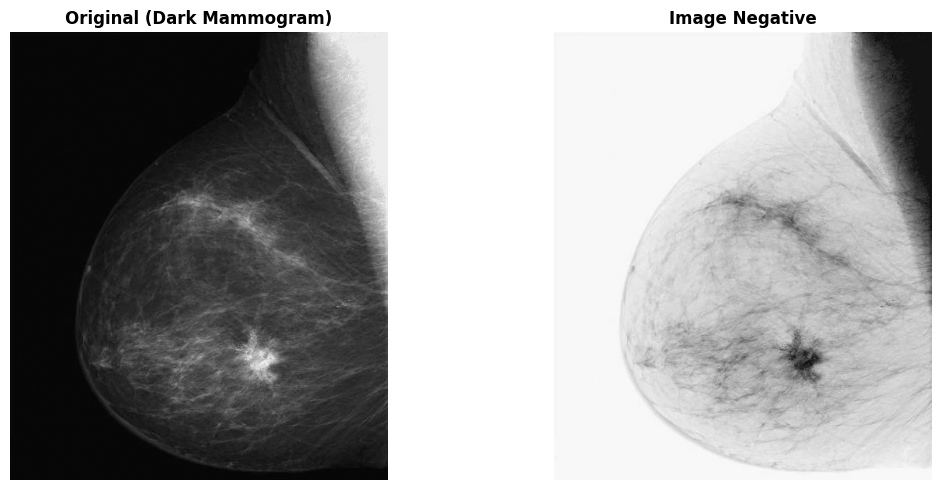

In [2]:
# Task 1: Image Negatives
img_neg = load_image('Fig0304(a)(breast_digital_Xray)_1.jpg')

# Manual implementation: s = 255 - r
img_negative = 255 - img_neg.astype(np.float32)
img_negative = np.clip(img_negative, 0, 255).astype(np.uint8)

show_comparison(img_neg, img_negative, "Original (Dark Mammogram)", "Image Negative")

### Task 2: Log Transformations (Fig 3.5)
Apply the transformation: $s = c \cdot \log(1 + r)$ where $c$ is scaled to fit 0-255

### Task 3: Gamma Correction (Fig 3.8 & 3.9)
- **Brightening:** Apply $\gamma = 0.6, 0.4, 0.3$ to dark images
- **Darkening:** Apply $\gamma = 3.0, 4.0, 5.0$ to washed-out images

Transformation: $s = c \cdot r^{\gamma}$ where $c = 1$ for normalized images

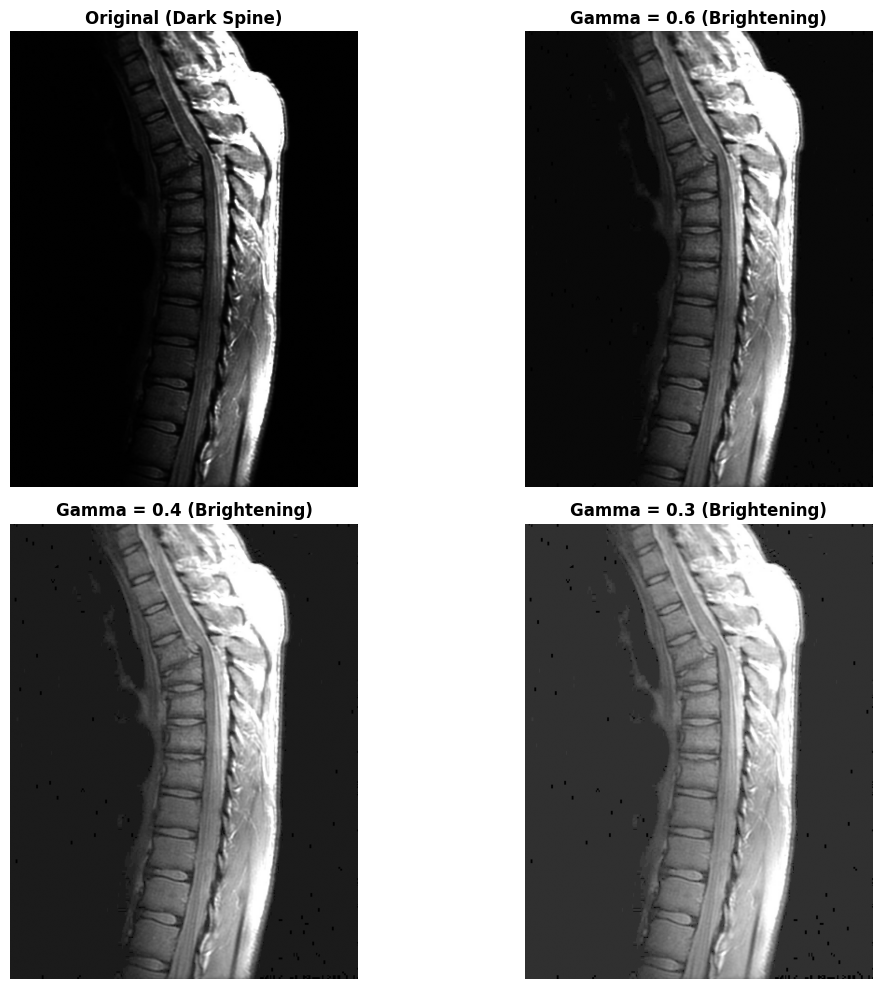

In [3]:
# Task 3a: Gamma Correction - Brightening (Fig 3.8)
img_gamma_bright = load_image('Fig0308(a)(fractured_spine).jpg')

# Manual implementation: s = c * r^gamma
# Normalize to [0, 1], apply gamma, scale back to [0, 255]
gamma_values_bright = [0.6, 0.4, 0.3]
img_normalized = img_gamma_bright.astype(np.float32) / 255.0

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(img_gamma_bright, cmap='gray')
axes[0, 0].set_title('Original (Dark Spine)', fontweight='bold')
axes[0, 0].axis('off')

for idx, gamma in enumerate(gamma_values_bright):
    img_gamma_result = np.power(img_normalized, gamma)
    img_gamma_result = (img_gamma_result * 255.0).astype(np.uint8)
    row = (idx + 1) // 2
    col = (idx + 1) % 2
    axes[row, col].imshow(img_gamma_result, cmap='gray')
    axes[row, col].set_title(f'Gamma = {gamma} (Brightening)', fontweight='bold')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

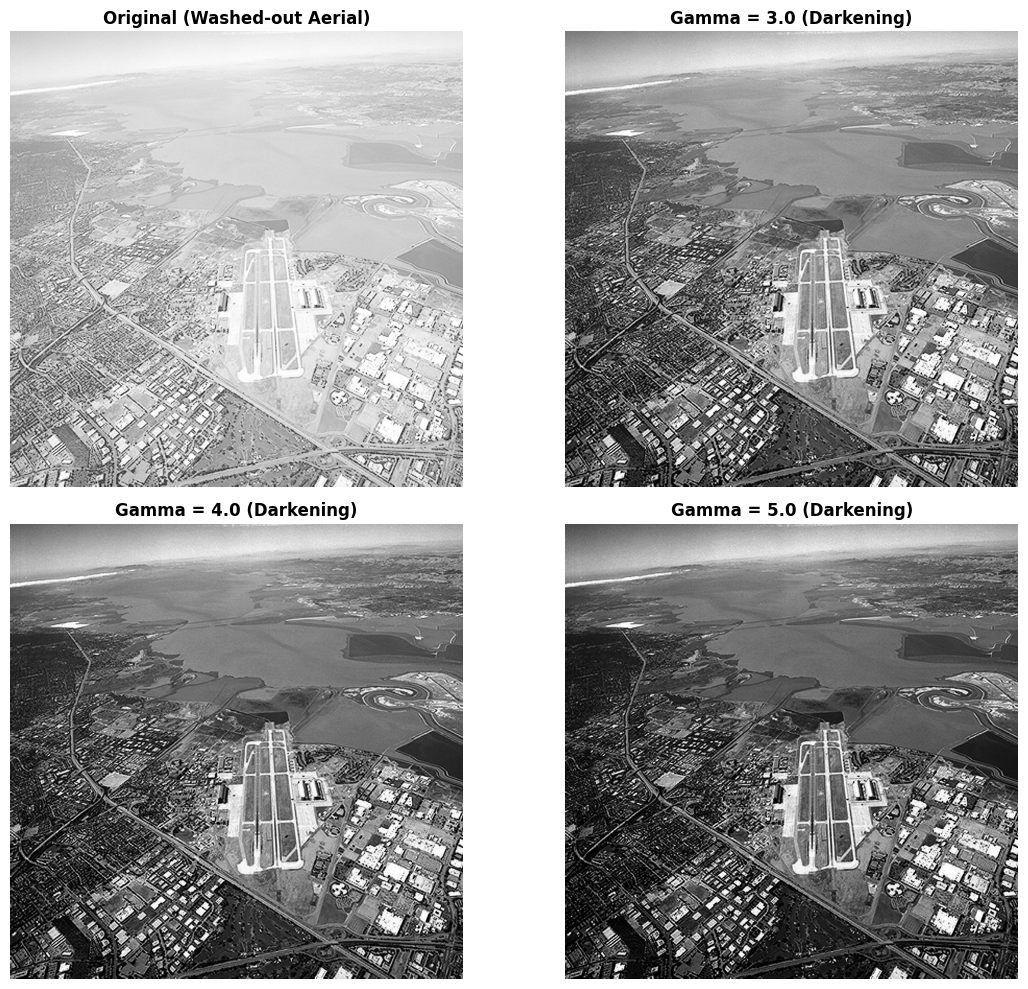

In [4]:
# Task 3b: Gamma Correction - Darkening (Fig 3.9)
img_gamma_dark = load_image('Fig0309(a)(washed_out_aerial_image).jpg')

# Manual implementation: s = c * r^gamma
gamma_values_dark = [3.0, 4.0, 5.0]
img_normalized_dark = img_gamma_dark.astype(np.float32) / 255.0

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(img_gamma_dark, cmap='gray')
axes[0, 0].set_title('Original (Washed-out Aerial)', fontweight='bold')
axes[0, 0].axis('off')

for idx, gamma in enumerate(gamma_values_dark):
    img_gamma_result = np.power(img_normalized_dark, gamma)
    img_gamma_result = (img_gamma_result * 255.0).astype(np.uint8)
    row = (idx + 1) // 2
    col = (idx + 1) % 2
    axes[row, col].imshow(img_gamma_result, cmap='gray')
    axes[row, col].set_title(f'Gamma = {gamma} (Darkening)', fontweight='bold')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### Task 4: Bit-Plane Slicing (Fig 3.14)
Extract and display all 8 bit planes (from LSB to MSB) in a $2 \times 4$ grid

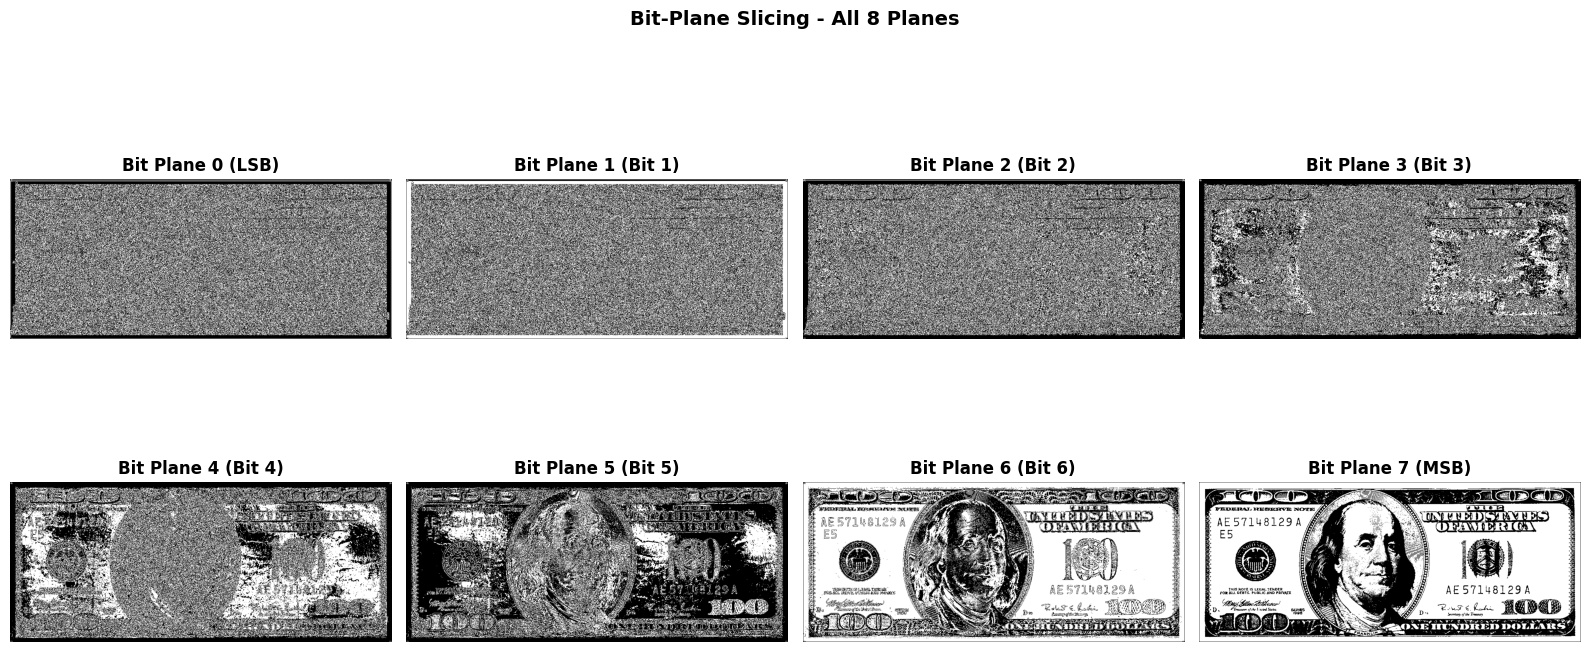

In [5]:
# Task 4: Bit-Plane Slicing
img_bitplane = load_image('Fig0314(a)(100-dollars)_1.jpg')

# Manual implementation: Extract each bit plane
# Bit plane k (0-7): (img >> k) & 1, then scale to 0-255
bit_planes = []
for k in range(8):
    bit_plane = ((img_bitplane >> k) & 1) * 255
    bit_planes.append(bit_plane)

# Display in 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for k in range(8):
    row = k // 4
    col = k % 4
    axes[row, col].imshow(bit_planes[k], cmap='gray')
    bit_name = "LSB" if k == 0 else ("MSB" if k == 7 else f"Bit {k}")
    axes[row, col].set_title(f'Bit Plane {k} ({bit_name})', fontweight='bold')
    axes[row, col].axis('off')

plt.suptitle('Bit-Plane Slicing - All 8 Planes', fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

## Part 2: Histogram Processing

### Task 5: Histogram Equalization (Fig 3.20)
Manually calculate histogram and CDF, then apply Global Histogram Equalization to 4 different images

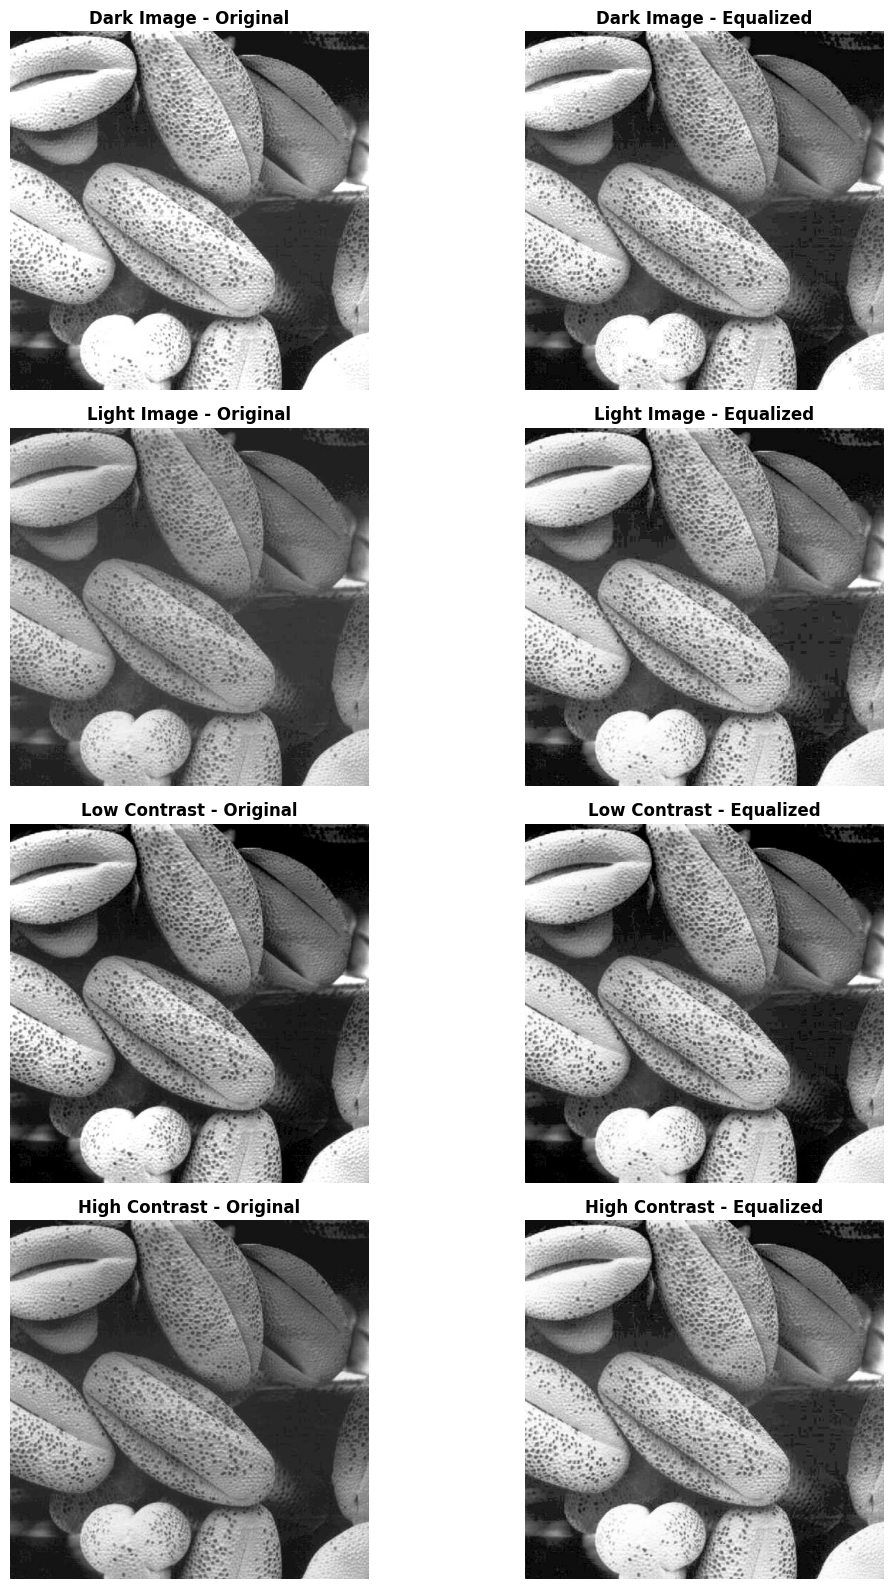

In [6]:
# Task 5: Histogram Equalization - Manual Implementation
def manual_histogram_equalization(img):
    """
    Manually implement histogram equalization:
    1. Calculate histogram
    2. Calculate CDF (Cumulative Distribution Function)
    3. Apply transformation: s = T(r) = (L-1) * CDF(r)
    """
    # Calculate histogram
    hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])
    
    # Calculate CDF
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]  # Normalize to [0, 1]
    
    # Apply transformation: s = (L-1) * CDF(r) where L=256
    img_equalized = (cdf_normalized[img] * 255).astype(np.uint8)
    
    return img_equalized, hist, cdf

# Load 4 different images
img_hist1 = load_image('Fig0316(1)(top_left)_1.jpg')  # Dark
img_hist2 = load_image('Fig0316(2)(2nd_from_top)_1.jpg')  # Light
img_hist3 = load_image('Fig0316(3)(third_from_top)_1.jpg')  # Low contrast
img_hist4 = load_image('Fig0316(4)(bottom_left)_1.jpg')  # High contrast

images_hist = [img_hist1, img_hist2, img_hist3, img_hist4]
titles_hist = ['Dark Image', 'Light Image', 'Low Contrast', 'High Contrast']

# Process all images
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
for idx, (img, title) in enumerate(zip(images_hist, titles_hist)):
    img_eq, hist, cdf = manual_histogram_equalization(img)
    
    # Original
    axes[idx, 0].imshow(img, cmap='gray')
    axes[idx, 0].set_title(f'{title} - Original', fontweight='bold')
    axes[idx, 0].axis('off')
    
    # Equalized
    axes[idx, 1].imshow(img_eq, cmap='gray')
    axes[idx, 1].set_title(f'{title} - Equalized', fontweight='bold')
    axes[idx, 1].axis('off')

plt.tight_layout()
plt.show()

### Task 6: Local Histogram Processing (Fig 3.26)
Implement Local Histogram Equalization using a $3 \times 3$ window moving pixel-by-pixel

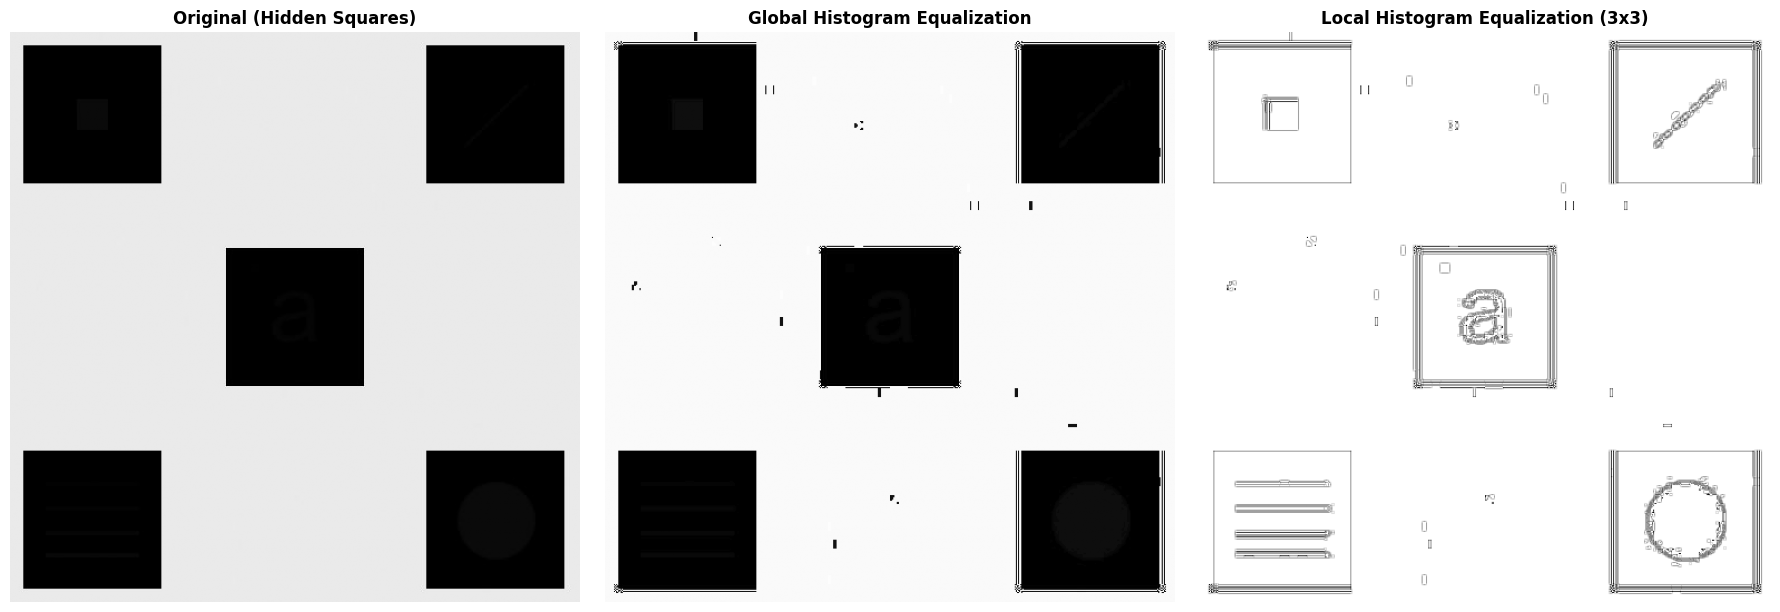

In [7]:
# Task 6: Local Histogram Equalization
def local_histogram_equalization(img, window_size=3):
    """
    Apply local histogram equalization using a sliding window.
    For each pixel, compute histogram equalization on its local neighborhood.
    """
    h, w = img.shape
    pad = window_size // 2
    img_padded = np.pad(img, pad, mode='reflect')
    img_local_eq = np.zeros_like(img)
    
    for i in range(h):
        for j in range(w):
            # Extract local window
            window = img_padded[i:i+window_size, j:j+window_size]
            # Calculate histogram and CDF for this window
            hist, _ = np.histogram(window.flatten(), bins=256, range=[0, 256])
            cdf = hist.cumsum()
            if cdf[-1] > 0:
                cdf_normalized = cdf / cdf[-1]
            else:
                cdf_normalized = cdf
            # Apply transformation to center pixel
            center_val = img[i, j]
            img_local_eq[i, j] = (cdf_normalized[center_val] * 255).astype(np.uint8)
    
    return img_local_eq

# Load the hidden squares image
img_local = load_image('Fig0326(a)(embedded_square_noisy_512).jpg')

# Apply local histogram equalization
img_local_eq = local_histogram_equalization(img_local, window_size=3)

# Apply global histogram equalization for comparison
img_global_eq, _, _ = manual_histogram_equalization(img_local)

# Display comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(img_local, cmap='gray')
axes[0].set_title('Original (Hidden Squares)', fontweight='bold', fontsize=12)
axes[0].axis('off')

axes[1].imshow(img_global_eq, cmap='gray')
axes[1].set_title('Global Histogram Equalization', fontweight='bold', fontsize=12)
axes[1].axis('off')

axes[2].imshow(img_local_eq, cmap='gray')
axes[2].set_title('Local Histogram Equalization (3x3)', fontweight='bold', fontsize=12)
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Part 3: Spatial Filtering

### Task 7: Smoothing Filters (Fig 3.33)
Apply Box Filters and Gaussian Filters of various sizes

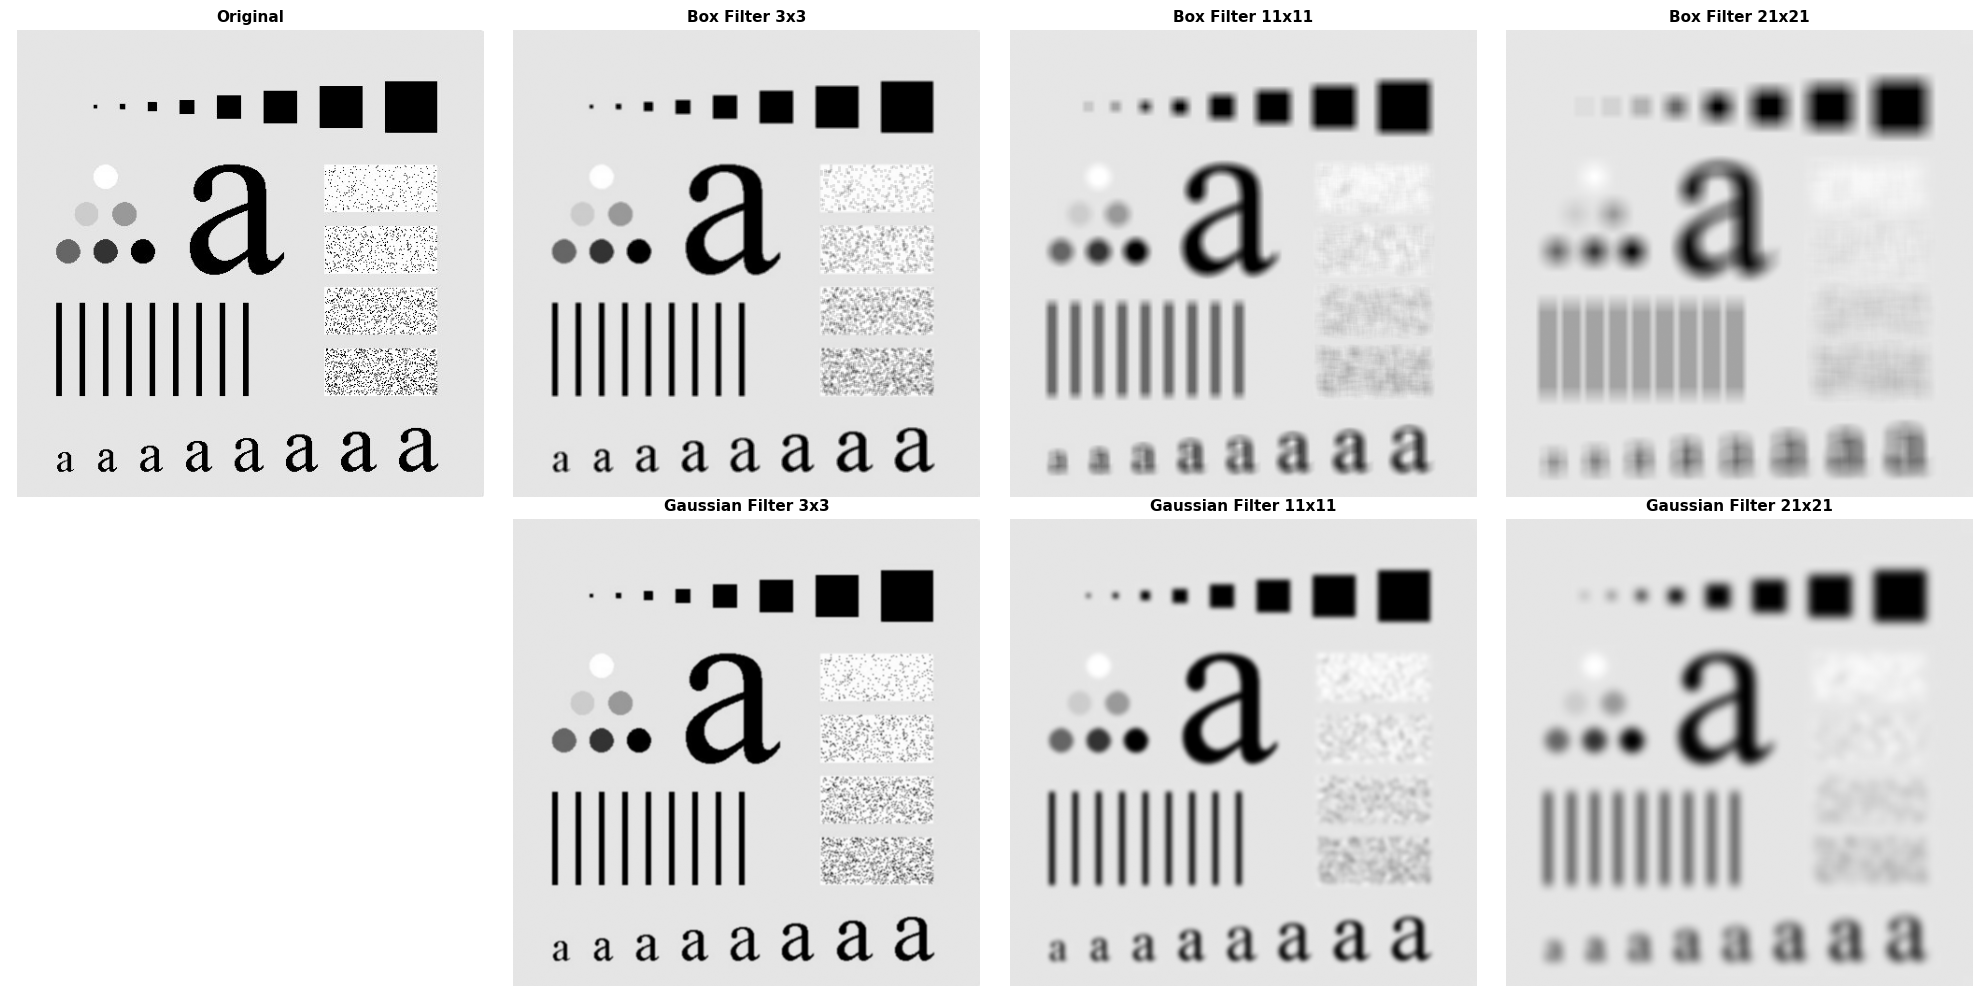

In [8]:
# Task 7: Smoothing Filters
def box_filter(img, size):
    """Manual implementation of box filter (averaging filter)."""
    kernel = np.ones((size, size), dtype=np.float32) / (size * size)
    pad = size // 2
    img_padded = np.pad(img.astype(np.float32), pad, mode='reflect')
    h, w = img.shape
    filtered = np.zeros_like(img, dtype=np.float32)
    
    for i in range(h):
        for j in range(w):
            window = img_padded[i:i+size, j:j+size]
            filtered[i, j] = np.sum(window * kernel)
    
    return np.clip(filtered, 0, 255).astype(np.uint8)

def gaussian_kernel(size, sigma):
    """Generate Gaussian kernel manually."""
    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2
    for i in range(size):
        for j in range(size):
            x, y = i - center, j - center
            kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)  # Normalize
    return kernel

def gaussian_filter(img, size, sigma):
    """Manual implementation of Gaussian filter."""
    kernel = gaussian_kernel(size, sigma)
    pad = size // 2
    img_padded = np.pad(img.astype(np.float32), pad, mode='reflect')
    h, w = img.shape
    filtered = np.zeros_like(img, dtype=np.float32)
    
    for i in range(h):
        for j in range(w):
            window = img_padded[i:i+size, j:j+size]
            filtered[i, j] = np.sum(window * kernel)
    
    return np.clip(filtered, 0, 255).astype(np.uint8)

# Load test pattern image
img_smooth = load_image('Fig0333(a)(test_pattern_blurring_orig)_1.jpg')

# Apply box filters
box_sizes = [3, 11, 21]
box_results = [box_filter(img_smooth, size) for size in box_sizes]

# Apply Gaussian filters with similar smoothing effects
# Sigma chosen to approximate the box filter smoothing
gaussian_results = [
    gaussian_filter(img_smooth, 3, 0.8),
    gaussian_filter(img_smooth, 11, 2.5),
    gaussian_filter(img_smooth, 21, 5.0)
]

# Display results
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes[0, 0].imshow(img_smooth, cmap='gray')
axes[0, 0].set_title('Original', fontweight='bold', fontsize=11)
axes[0, 0].axis('off')

for idx, (size, box_img, gauss_img) in enumerate(zip(box_sizes, box_results, gaussian_results)):
    axes[0, idx+1].imshow(box_img, cmap='gray')
    axes[0, idx+1].set_title(f'Box Filter {size}x{size}', fontweight='bold', fontsize=11)
    axes[0, idx+1].axis('off')
    
    axes[1, idx+1].imshow(gauss_img, cmap='gray')
    axes[1, idx+1].set_title(f'Gaussian Filter {size}x{size}', fontweight='bold', fontsize=11)
    axes[1, idx+1].axis('off')

axes[1, 0].axis('off')
plt.tight_layout()
plt.show()

### Task 8: Sharpening Filters - Laplacian (Fig 3.38 & 3.40)
Compute the Laplacian and sharpen: $Result = Original + c \cdot Laplacian$

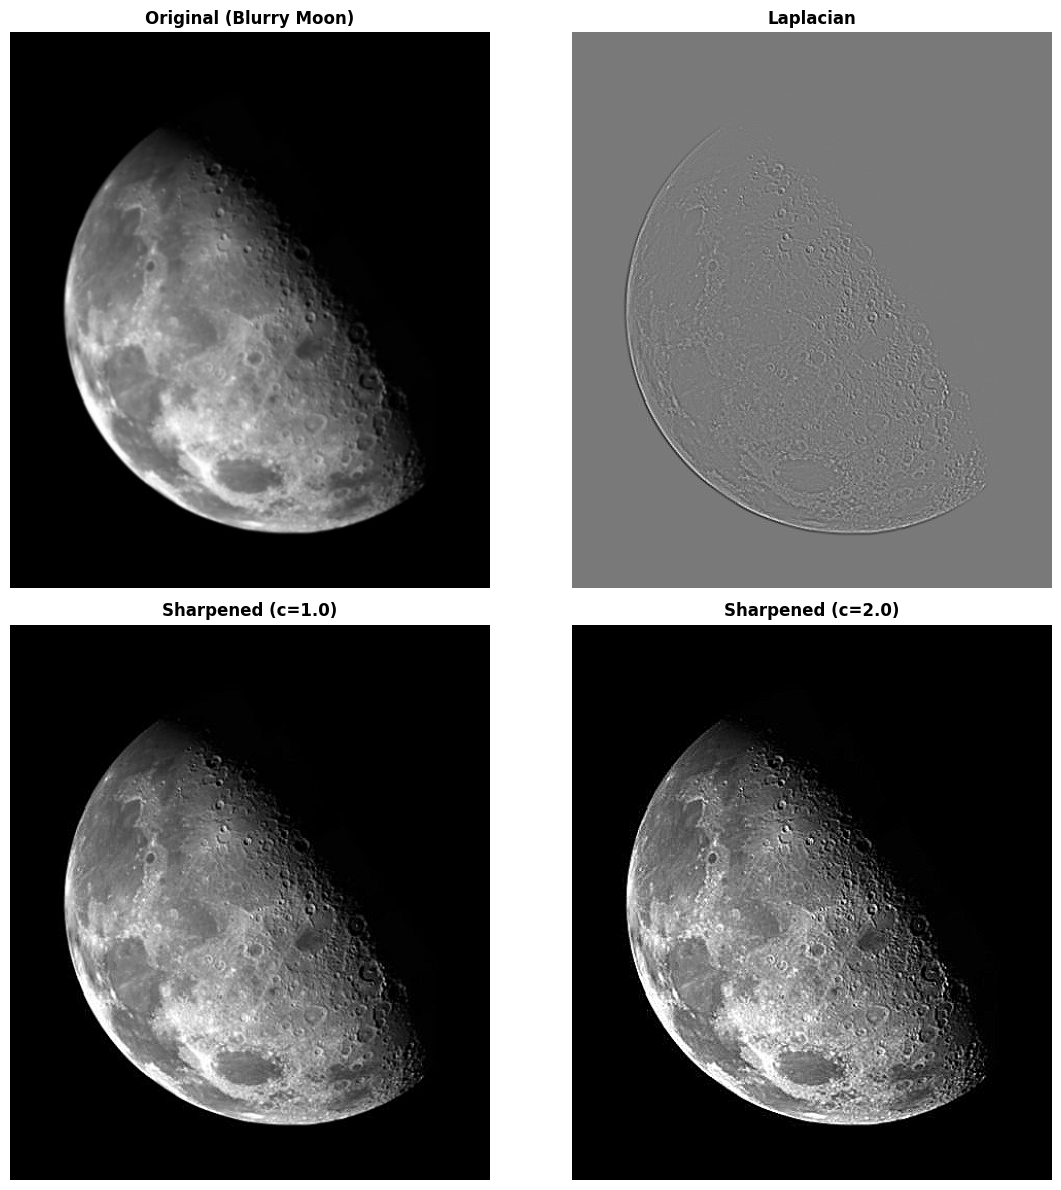

In [9]:
# Task 8: Laplacian Sharpening
def laplacian_filter(img):
    """Manual implementation of Laplacian filter."""
    # Laplacian kernel (4-neighbor version)
    kernel = np.array([[0, -1, 0],
                       [-1, 4, -1],
                       [0, -1, 0]], dtype=np.float32)
    
    pad = 1
    img_padded = np.pad(img.astype(np.float32), pad, mode='reflect')
    h, w = img.shape
    laplacian = np.zeros_like(img, dtype=np.float32)
    
    for i in range(h):
        for j in range(w):
            window = img_padded[i:i+3, j:j+3]
            laplacian[i, j] = np.sum(window * kernel)
    
    return laplacian

def sharpen_with_laplacian(img, c=1.0):
    """Sharpen image using Laplacian: Result = Original + c * Laplacian"""
    laplacian = laplacian_filter(img)
    sharpened = img.astype(np.float32) + c * laplacian
    return np.clip(sharpened, 0, 255).astype(np.uint8)

# Load moon image
img_sharpen = load_image('Fig0338(a)(blurry_moon).jpg')

# Compute Laplacian
laplacian_result = laplacian_filter(img_sharpen)
# Normalize Laplacian for display
laplacian_display = ((laplacian_result - laplacian_result.min()) / 
                     (laplacian_result.max() - laplacian_result.min() + 1e-10) * 255).astype(np.uint8)

# Sharpen with different c values
sharpened_c1 = sharpen_with_laplacian(img_sharpen, c=1.0)
sharpened_c2 = sharpen_with_laplacian(img_sharpen, c=2.0)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0, 0].imshow(img_sharpen, cmap='gray')
axes[0, 0].set_title('Original (Blurry Moon)', fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(laplacian_display, cmap='gray')
axes[0, 1].set_title('Laplacian', fontweight='bold')
axes[0, 1].axis('off')

axes[1, 0].imshow(sharpened_c1, cmap='gray')
axes[1, 0].set_title('Sharpened (c=1.0)', fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(sharpened_c2, cmap='gray')
axes[1, 1].set_title('Sharpened (c=2.0)', fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

### Task 9: Unsharp Masking (Fig 3.43)
Create mask: $Mask = Original - Blurred$, then boost: $Result = Original + k \cdot Mask$

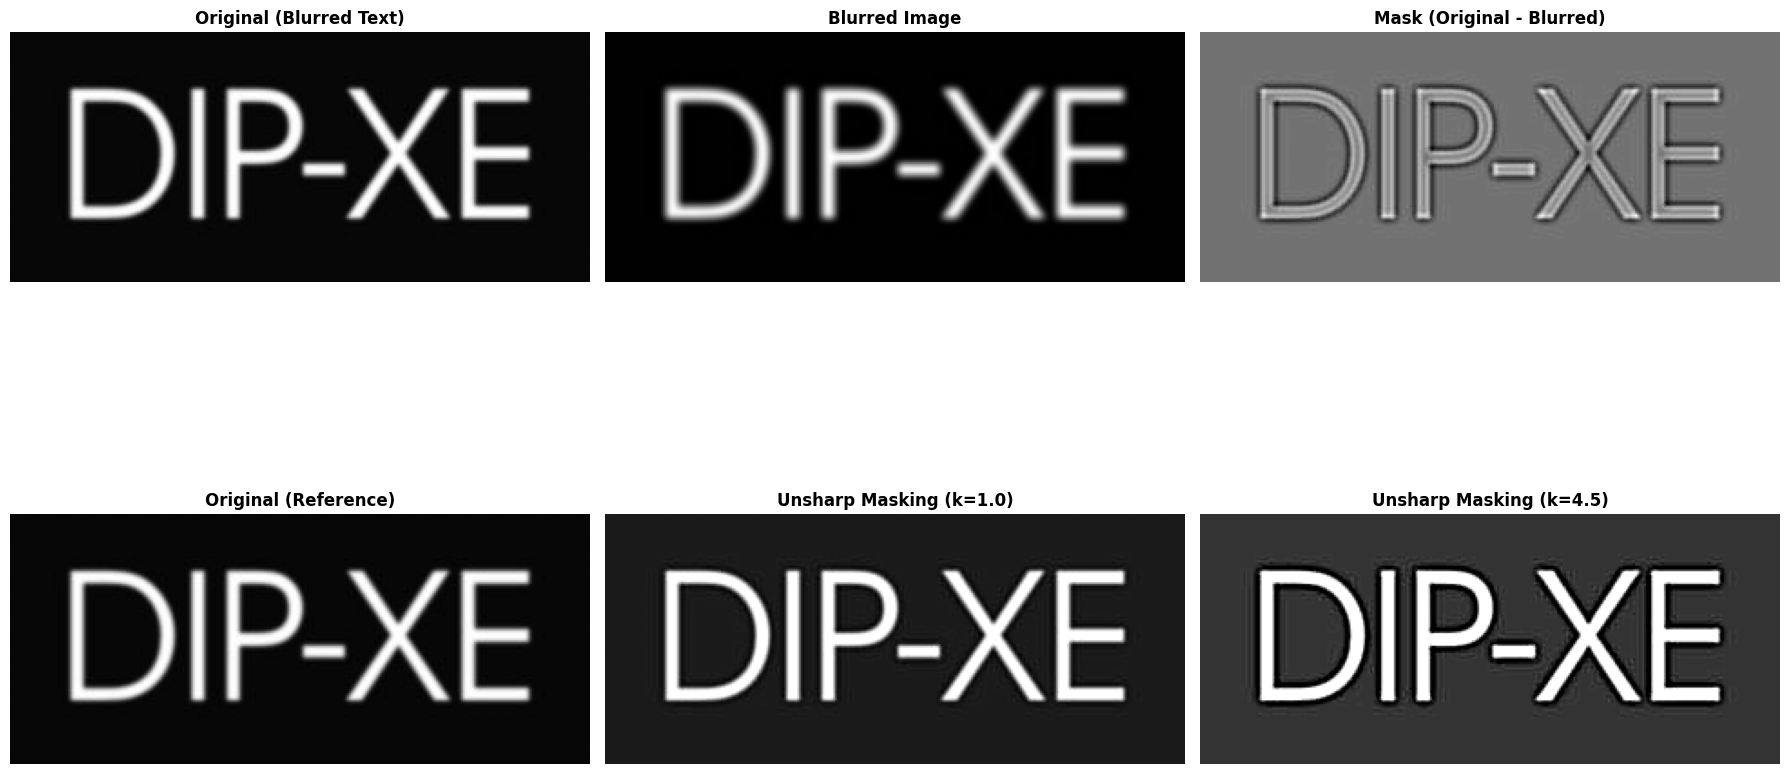

In [10]:
# Task 9: Unsharp Masking
def unsharp_masking(img, blur_size=5, k=1.0):
    """
    Unsharp masking:
    1. Blur the original image
    2. Create mask: Mask = Original - Blurred
    3. Boost: Result = Original + k * Mask
    """
    # Step 1: Blur the image (using box filter as approximation)
    blurred = box_filter(img, blur_size)
    
    # Step 2: Create mask
    mask = img.astype(np.float32) - blurred.astype(np.float32)
    
    # Step 3: Boost
    result = img.astype(np.float32) + k * mask
    result = np.clip(result, 0, 255).astype(np.uint8)
    
    return blurred, mask, result

# Load blurred text image
img_unsharp = load_image('Fig0340(a)(dipxe_text).jpg')

# Apply unsharp masking with k=1 and k=4.5
blurred, mask, result_k1 = unsharp_masking(img_unsharp, blur_size=5, k=1.0)
_, _, result_k45 = unsharp_masking(img_unsharp, blur_size=5, k=4.5)

# Normalize mask for display
mask_display = ((mask - mask.min()) / (mask.max() - mask.min() + 1e-10) * 255).astype(np.uint8)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes[0, 0].imshow(img_unsharp, cmap='gray')
axes[0, 0].set_title('Original (Blurred Text)', fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(blurred, cmap='gray')
axes[0, 1].set_title('Blurred Image', fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(mask_display, cmap='gray')
axes[0, 2].set_title('Mask (Original - Blurred)', fontweight='bold')
axes[0, 2].axis('off')

axes[1, 0].imshow(img_unsharp, cmap='gray')
axes[1, 0].set_title('Original (Reference)', fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(result_k1, cmap='gray')
axes[1, 1].set_title('Unsharp Masking (k=1.0)', fontweight='bold')
axes[1, 1].axis('off')

axes[1, 2].imshow(result_k45, cmap='gray')
axes[1, 2].set_title('Unsharp Masking (k=4.5)', fontweight='bold')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## Part 4: Mixed Spatial Enhancement (Fig 3.46 / 3.57)

### Task 10: The Grand Finale
Multi-step enhancement combining Laplacian, Sobel gradient, and gamma correction

Step 1: Computing Laplacian...


Step 2: Adding Laplacian to Original (Sharpening)...
Step 3: Computing Sobel Gradient...


Step 4: Averaging Sobel Gradient (5x5 box)...


Step 5: Multiplying Laplacian × Smoothed Gradient...
Step 6: Adding result to Original...
Step 7: Applying Gamma Correction (γ=0.5)...


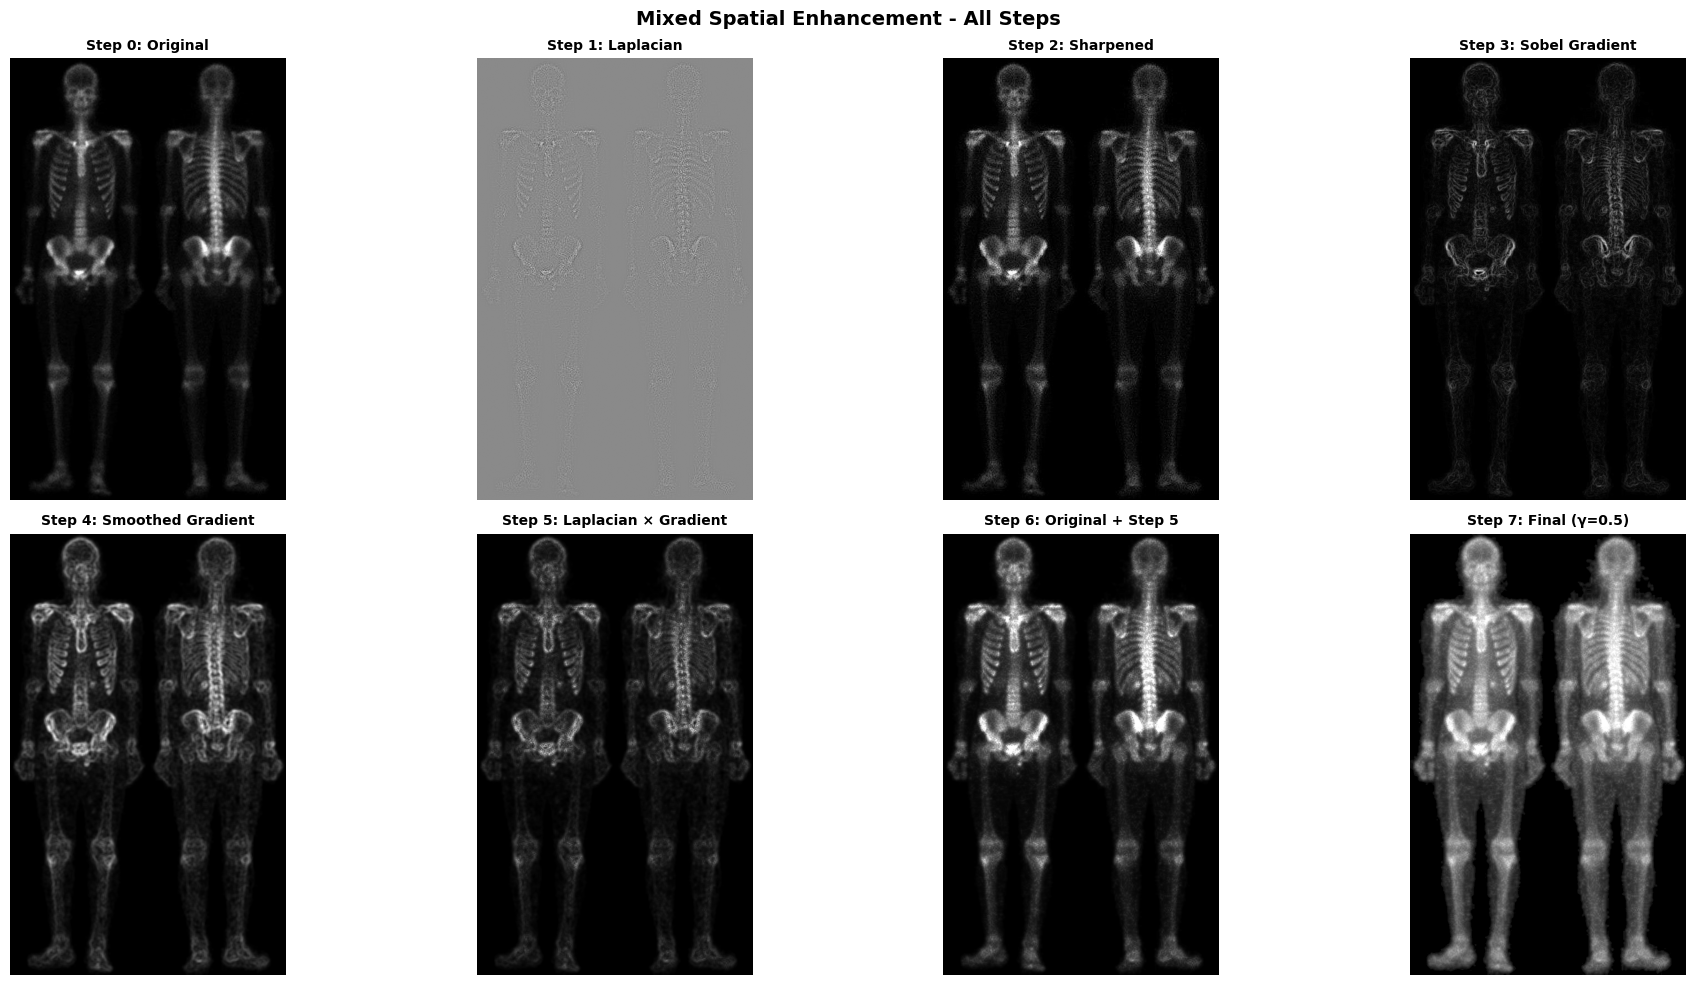

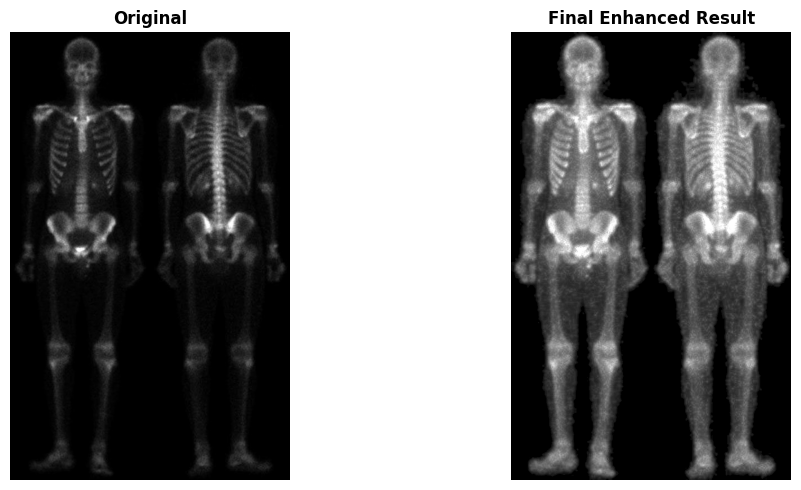

In [11]:
# Task 10: Mixed Spatial Enhancement
def sobel_gradient(img):
    """Manual implementation of Sobel gradient magnitude."""
    # Sobel kernels
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=np.float32)
    
    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]], dtype=np.float32)
    
    pad = 1
    img_padded = np.pad(img.astype(np.float32), pad, mode='reflect')
    h, w = img.shape
    grad_x = np.zeros_like(img, dtype=np.float32)
    grad_y = np.zeros_like(img, dtype=np.float32)
    
    for i in range(h):
        for j in range(w):
            window = img_padded[i:i+3, j:j+3]
            grad_x[i, j] = np.sum(window * sobel_x)
            grad_y[i, j] = np.sum(window * sobel_y)
    
    # Gradient magnitude
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    return gradient_magnitude

# Load skeleton image (or use another suitable image)
img_mixed = load_image('Fig0343(a)(skeleton_orig)_1.jpg')

print("Step 1: Computing Laplacian...")
laplacian_mixed = laplacian_filter(img_mixed)

print("Step 2: Adding Laplacian to Original (Sharpening)...")
sharpened_mixed = img_mixed.astype(np.float32) + laplacian_mixed
sharpened_mixed = np.clip(sharpened_mixed, 0, 255).astype(np.uint8)

print("Step 3: Computing Sobel Gradient...")
sobel_grad = sobel_gradient(img_mixed)

print("Step 4: Averaging Sobel Gradient (5x5 box)...")
sobel_smoothed = box_filter(sobel_grad.astype(np.uint8), 5).astype(np.float32)

print("Step 5: Multiplying Laplacian × Smoothed Gradient...")
# Normalize both to similar scales for multiplication
laplacian_norm = ((laplacian_mixed - laplacian_mixed.min()) / 
                  (laplacian_mixed.max() - laplacian_mixed.min() + 1e-10))
sobel_norm = ((sobel_smoothed - sobel_smoothed.min()) / 
              (sobel_smoothed.max() - sobel_smoothed.min() + 1e-10))
multiplied = laplacian_norm * sobel_norm * 255

print("Step 6: Adding result to Original...")
result_step6 = img_mixed.astype(np.float32) + multiplied
result_step6 = np.clip(result_step6, 0, 255).astype(np.uint8)

print("Step 7: Applying Gamma Correction (γ=0.5)...")
img_normalized_final = result_step6.astype(np.float32) / 255.0
final_result = np.power(img_normalized_final, 0.5)
final_result = (final_result * 255.0).astype(np.uint8)

# Display all steps
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

axes[0, 0].imshow(img_mixed, cmap='gray')
axes[0, 0].set_title('Step 0: Original', fontweight='bold', fontsize=10)
axes[0, 0].axis('off')

laplacian_disp = ((laplacian_mixed - laplacian_mixed.min()) / 
                  (laplacian_mixed.max() - laplacian_mixed.min() + 1e-10) * 255).astype(np.uint8)
axes[0, 1].imshow(laplacian_disp, cmap='gray')
axes[0, 1].set_title('Step 1: Laplacian', fontweight='bold', fontsize=10)
axes[0, 1].axis('off')

axes[0, 2].imshow(sharpened_mixed, cmap='gray')
axes[0, 2].set_title('Step 2: Sharpened', fontweight='bold', fontsize=10)
axes[0, 2].axis('off')

sobel_disp = ((sobel_grad - sobel_grad.min()) / 
              (sobel_grad.max() - sobel_grad.min() + 1e-10) * 255).astype(np.uint8)
axes[0, 3].imshow(sobel_disp, cmap='gray')
axes[0, 3].set_title('Step 3: Sobel Gradient', fontweight='bold', fontsize=10)
axes[0, 3].axis('off')

sobel_smooth_disp = sobel_smoothed.astype(np.uint8)
axes[1, 0].imshow(sobel_smooth_disp, cmap='gray')
axes[1, 0].set_title('Step 4: Smoothed Gradient', fontweight='bold', fontsize=10)
axes[1, 0].axis('off')

mult_disp = multiplied.astype(np.uint8)
axes[1, 1].imshow(mult_disp, cmap='gray')
axes[1, 1].set_title('Step 5: Laplacian × Gradient', fontweight='bold', fontsize=10)
axes[1, 1].axis('off')

axes[1, 2].imshow(result_step6, cmap='gray')
axes[1, 2].set_title('Step 6: Original + Step 5', fontweight='bold', fontsize=10)
axes[1, 2].axis('off')

axes[1, 3].imshow(final_result, cmap='gray')
axes[1, 3].set_title('Step 7: Final (γ=0.5)', fontweight='bold', fontsize=10)
axes[1, 3].axis('off')

plt.suptitle('Mixed Spatial Enhancement - All Steps', fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Final comparison
show_comparison(img_mixed, final_result, "Original", "Final Enhanced Result")

## Export to PDF

To convert this notebook to PDF, run the following command in your terminal:

```bash
jupyter nbconvert --to pdf Assignment_Chapter3.ipynb
```

Or use the Python script below:

In [12]:
# Convert notebook to PDF
import subprocess
import sys

try:
    # Try using nbconvert
    result = subprocess.run(
        ['jupyter', 'nbconvert', '--to', 'pdf', 'Assignment_Chapter3.ipynb'],
        capture_output=True,
        text=True
    )
    if result.returncode == 0:
        print("✓ Successfully converted to PDF: Assignment_Chapter3.pdf")
    else:
        print("Error converting to PDF:")
        print(result.stderr)
        print("\nAlternative: Use Jupyter Notebook's File → Print Preview → Print to PDF")
except FileNotFoundError:
    print("jupyter nbconvert not found. Please install it with:")
    print("  pip install nbconvert")
    print("\nOr use Jupyter Notebook's File → Print Preview → Print to PDF")
except Exception as e:
    print(f"Error: {e}")
    print("\nAlternative: Use Jupyter Notebook's File → Print Preview → Print to PDF")

jupyter nbconvert not found. Please install it with:
  pip install nbconvert

Or use Jupyter Notebook's File → Print Preview → Print to PDF
